In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#df = pd.read_csv("../faults_memory.csv")
df = pd.read_csv("~/Downloads/faults_memory.csv")
display(df)

,attempt,stop_addr,stop_fn,delay,target,bitflip,code
0,0,0x080195ec,Reset_Handler,0.0028,0x20005c3d,16,0
1,1,0x080195ea,Reset_Handler,0.0026,0x20005b02,32,0
2,2,0x080195e6,Reset_Handler,0.0052,0x200096eb,8,0
3,3,0x08000f22,HAL_RCC_OscConfig,0.0080,0x2000daef,8,0
4,4,0x080195e6,Reset_Handler,0.0036,0x200077bb,2,0
...,...,...,...,...,...,...,...
22890,22799,0x0800f264,prvIdleTask,4.5676,0x20007cac,16,0
22891,22800,0x0800f1a2,prvIdleTask,4.5678,0x2000ab35,4,0
22892,22801,0x0800f21c,prvIdleTask,4.5680,0x2000ae62,2,0
22893,22802,0x0800f1a2,prvIdleTask,4.5672,0x20000528,32,0


In [3]:
cfgv_functions = pd.read_csv('../compiled_cfgv_functions.csv')
eddi_functions = pd.read_csv('../compiled_eddi_functions.csv')
cfgv_functions.equals(eddi_functions) # we are compiling the exact same functions with both mechanisms

True

In [4]:
compiled_functions = cfgv_functions

In [5]:
sz_tot = df.shape[0]
df_errcodes = df.groupby('code')
sz_df_errcodes = df_errcodes.size()

In [6]:
num_crash = sz_df_errcodes[-1]      # crash     = -1
num_silent = sz_df_errcodes[-2]     # sdc       = -2
num_freeze = sz_df_errcodes[-3]     # froze     = -3 (stuck into an infinite loop)
num_detect = sz_df_errcodes[1]      # detect    =  1

tot_faults = num_crash + num_silent + num_freeze + num_detect

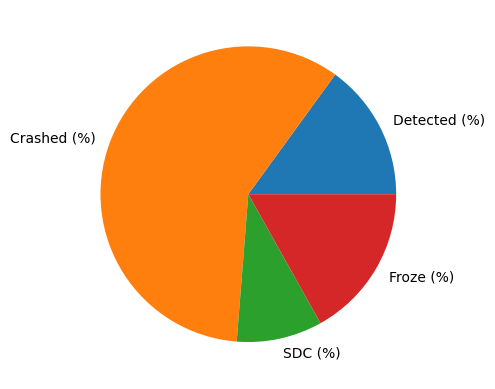

In [7]:
labels = 'Detected (%)','Crashed (%)','SDC (%)', 'Froze (%)'
plt.pie([num_detect/tot_faults, num_crash/tot_faults, num_silent/tot_faults, num_freeze/tot_faults], labels = labels)
plt.show()

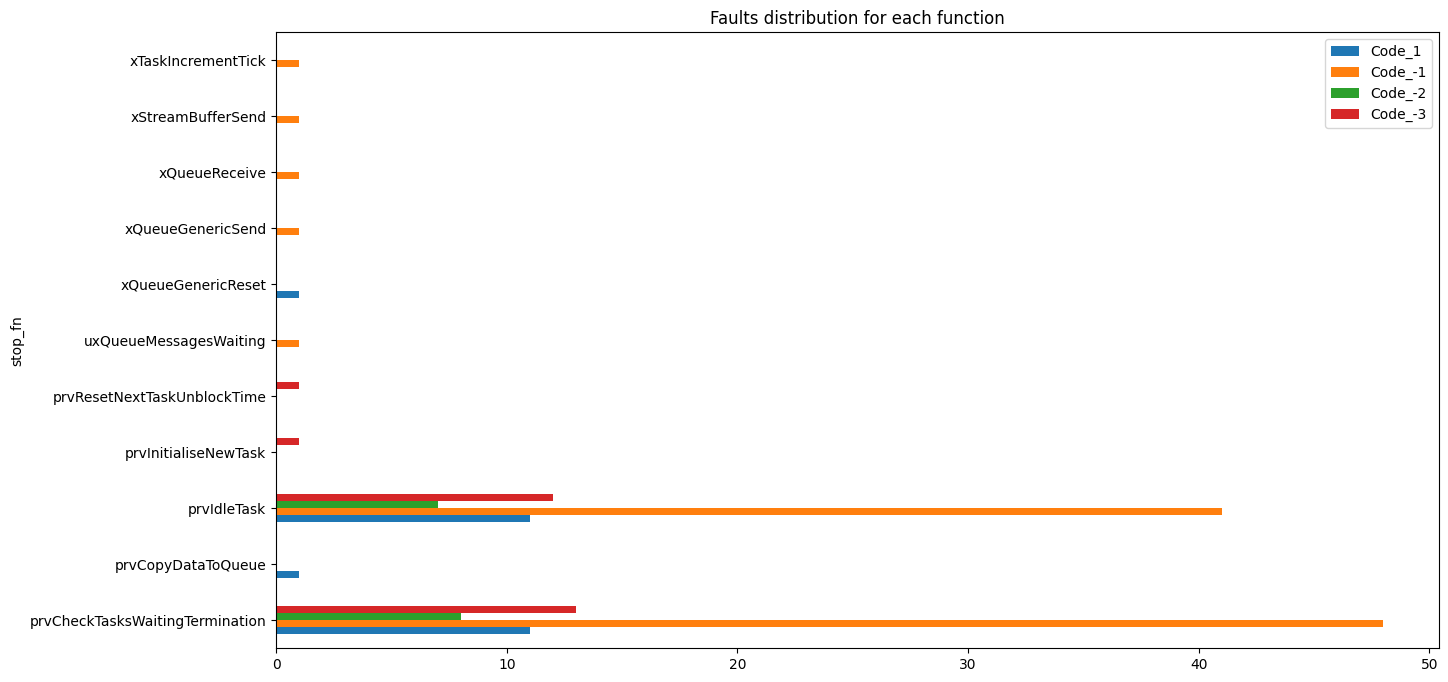

In [8]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,8),
                                  title = 'Faults distribution for each function',)

In [9]:
df['fn_name'] = df['stop_fn']
df = pd.merge(df, compiled_functions, on='fn_name')
df

,attempt,stop_addr,stop_fn,delay,target,bitflip,code,fn_name
0,16,0x0800edf4,prvInitialiseTaskLists,0.0088,0x2000c1d1,8,0,prvInitialiseTaskLists
1,22,0x0800edfe,prvInitialiseTaskLists,0.0088,0x2000103e,128,0,prvInitialiseTaskLists
2,30,0x0800edc6,prvInitialiseTaskLists,0.0088,0x200084f6,1,0,prvInitialiseTaskLists
3,19,0x08010884,SystemClock_Config,0.0078,0x200053ff,8,0,SystemClock_Config
4,22,0x0800f28a,prvIdleTask,0.0142,0x20008b28,1,0,prvIdleTask
...,...,...,...,...,...,...,...,...
22692,16518,0x08003c42,vTaskTaskTest,3.3114,0x200063fa,64,0,vTaskTaskTest
22693,15024,0x080142a6,xStreamBufferIsFull,3.0120,0x20002d4a,16,0,xStreamBufferIsFull
22694,16484,0x08002d22,vTaskQueueTest4,3.3054,0x20008905,8,0,vTaskQueueTest4
22695,19598,0x080145bc,prvInitialiseNewQueue,3.9244,0x2000d1ed,1,0,prvInitialiseNewQueue


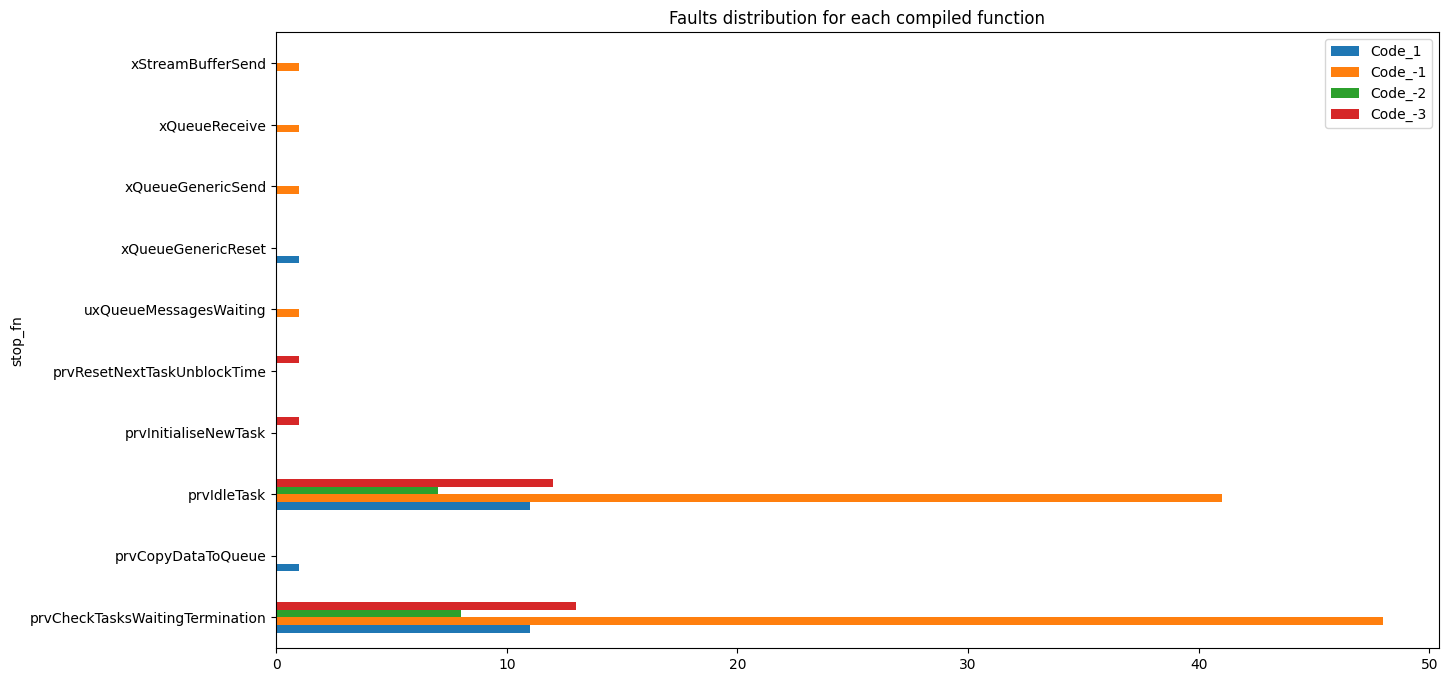

In [10]:
df_onehot = pd.get_dummies(df['code'], prefix="Code")
df1 = df.join(df_onehot)
df1 = df1.groupby(['stop_fn']).sum(numeric_only=True)
plot = df1[df1['code'] != 0].plot(y=['Code_1', 'Code_-1', 'Code_-2', 'Code_-3'],
                                  kind="barh",
                                  figsize=(15,8),
                                  title = 'Faults distribution for each compiled function',)